In [7]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

In [8]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

In [9]:
#cutString =  "(l_pt2<0 && l_pt1>30 && abs(l_eta1)<2.5 && pfMET_Corr>50 && PuppiAK8_jet_tau2tau1<0.55 && ungroomed_PuppiAK8_jet_pt>200 abs(ungroomed_PuppiAK8_jet_eta)<2.4 && nBTagJet_loose==0 && BosonCentrality_type0>1.0 && (ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3 && (ZeppenfeldWH/vbf_maxpt_jj_Deta) <0.3 && vbf_maxpt_jj_m>800 && vbf_maxpt_jj_Deta>4.0 && vbf_maxpt_j1_pt>30 && vbf_maxpt_j2_pt>30 && (PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<150) &(mass_lvj_type0>170)"

rrv_l_pt2 = r.RooRealVar("rrv_l_pt2","rrv_l_pt2",-10000,10000)
rrv_l_pt1 = r.RooRealVar("rrv_l_pt1","rrv_l_pt1",0,1000)
rfv_cutstring = r.RooFormulaVar("rfv_cutstring","rfv_cutstring","l_pt2<0 && l_pt1>30",
                               r.RooArgList(rrv_l_pt2,rrv_l_pt1)
                               )

In [10]:
rrv_x = r.RooRealVar("mass_lvj_type0","mass_lvj_type0",170,3500)
data1 = r.RooDataSet("data1","data1",treeIn,r.RooArgSet(rrv_x))
data2 = r.RooDataSet("data2","data2",treeIn,r.RooArgSet(rrv_x),r.RooFormulaVar(rfv_cutstring))

Error in <RooFormula::Compile>:  Bad numerical expression : "l_pt2"


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


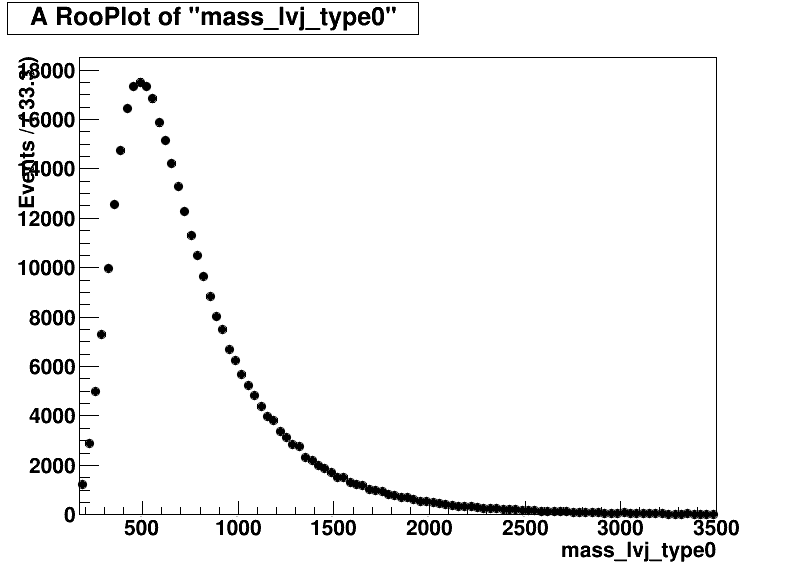

In [11]:
frame = rrv_x.frame() 
data1.plotOn(frame)
#data2.plotOn(frame)
c1 = r.TCanvas("c1", "canvas1", 800, 600)
frame.Draw()
c1.Draw()

In [ ]:
def createCanvasPads():
    c = r.TCanvas("c", "canvas", 1600, 800)
    # Upper histogram plot is pad1
    pad1 = r.TPad("pad1", "pad1", 0.0, 0.0, 0.5, 1.0)
    pad1.SetTopMargin(0.15)
    pad1.SetBottomMargin(0.15)  # joins upper and lower plot
    pad1.SetLeftMargin(0.0)
    pad1.SetRightMargin(0.15)
    pad1.SetLogy(1)
    pad1.SetGridx()
    pad1.SetTickx(1)
    pad1.SetTicky(1)
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = r.TPad("pad2", "pad2", 0.5, 0.00, 1.0, 1.0)
    #pad2.SetLogy(1)
    pad2.SetTopMargin(0.15)  # joins upper and lower plot
    pad2.SetBottomMargin(0.15)
    pad2.SetLeftMargin(0.15)
    pad2.SetRightMargin(0.0)
    pad2.SetGridx()
    pad2.SetTickx(1)
    pad2.SetTicky(1)
    pad2.Draw()

    return c, pad1, pad2

**Get histogram to RooVariable and delete the histogram**

In [ ]:
rrv_x = r.RooRealVar("rrv_x","WW invariant mass",170,3500);
dh =  r.RooDataHist("dh","plotOn test data with x",r.RooArgList(rrv_x),h1)

h1.Delete()

## 1. Dan's Function

$$f(x) = e^{p_0(x + p_1x^2)}$$

In [ ]:
rrv_a_Dan = r.RooRealVar("rrv_a_Dan","rrv_a_Dan",-2.28320e-03,-10.28320e-03,-0.28320e-05);
rrv_b_Dan = r.RooRealVar("rrv_b_Dan","rrv_b_Dan",-2.28320e-03,-10.28320e-03,-0.28320e-03);
model_Dan = r.RooExpDan("model_Dan","model_Dan",rrv_x,rrv_a_Dan,rrv_b_Dan);
#model_Dan.fitTo(dh,r.RooFit.Save(1))
model_Dan.fitTo(dh)


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_Dan.plotOn(frame, r.RooFit.LineColor(2))
model_Dan.paramOn(frame)

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## 2. Landau

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()
rrv_c_Landau = r.RooRealVar("rrv_c_Landau","rrv_c_Landau",50,20,2500);
rrv_n_Landau = r.RooRealVar("rrv_n_Landau","rrv_n_Landau",10,10,500);

model_landau = r.RooLandau("model_landau","model_landau",rrv_x,rrv_c_Landau,rrv_n_Landau) 

model_landau.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_landau.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## 3. Gaussian

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_Gaus = r.RooRealVar("rrv_c_Gaus","rrv_c_Gaus",583,200, 700);
rrv_n_Gaus = r.RooRealVar("rrv_n_Gaus","rrv_n_Gaus",100,5,400);
model_gaus = r.RooGaussian("model_gaus","model_gaus",rrv_x,rrv_c_Gaus, rrv_n_Gaus);

model_gaus.fitTo(dh)

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_gaus.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

# ErfExp

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.05,-0.1,-1e-4);
rrv_offset_ErfExp = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",60.,30.,120);
rrv_width_ErfExp = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp",30.,10, 60.)
model_ErfExp = r.RooErfExpPdf("model_ErfExp","model_ErfExp",rrv_x,rrv_c_ErfExp, rrv_offset_ErfExp, rrv_width_ErfExp);

model_ErfExp.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp V1 (Different initial parameters)

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp_v1 = r.RooRealVar("rrv_c_ErfExp_v1","rrv_c_ErfExp_v1",-0.006,-0.1,0.);
rrv_offset_ErfExp_v1 = r.RooRealVar("rrv_offset_ErfExp_v1","rrv_offset_ErfExp_v1",450.,400.,550.);
rrv_width_ErfExp_v1 = r.RooRealVar("rrv_width_ErfExp_v1","rrv_width_ErfExp_v1",70.,10,100.)
model_ErfExp_v1 = r.RooErfExpPdf("model_ErfExp_v1","model_ErfExp_v1",rrv_x,rrv_c_ErfExp_v1, rrv_offset_ErfExp_v1, rrv_width_ErfExp_v1);

model_ErfExp_v1.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v1.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp v2

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.006,-0.1,0.);
rrv_offset_ErfExp = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",450.,400.,550.);
rrv_width_ErfExp = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp",70.,10,100.)
rrv_residue_ErfExp = r.RooRealVar("rrv_residue_ErfExp","rrv_residue_ErfExp",0.,0.,1.)
#model_ErfExp_v2 = r.RooErfExpPdf("model_ErfExp_v2","model_ErfExp_v2",rrv_x,rrv_c_ErfExp_v2, rrv_offset_ErfExp_v2, rrv_width_ErfExp_v2);

model_ErfExp_v2 = r.RooGenericPdf("model_ErfExp_v2","model_ErfExp_v2","(TMath::Exp(%s*%s) + %s)*(1.+TMath::Erf((%s-%s)/%s))/2. "%(rrv_c_ErfExp.GetName(),rrv_x.GetName(), rrv_residue_ErfExp.GetName(), rrv_x.GetName(),rrv_offset_ErfExp.GetName(), rrv_width_ErfExp.GetName()), r.RooArgList(rrv_x,rrv_c_ErfExp,rrv_offset_ErfExp,rrv_width_ErfExp,rrv_residue_ErfExp))

model_ErfExp_v2.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v2.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp V3

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp       = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.005,-0.1,0.);
rrv_offset_ErfExp  = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",450.,400,500.);
rrv_width_ErfExp   = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp", 50.,10,100.);
rrv_residue_ErfExp = r.RooRealVar("rrv_residue_ErfExp","rrv_residue_ErfExp",0.,0.,1.);
rrv_high_ErfExp    = r.RooRealVar("rrv_high_ErfExp","rrv_high_ErfExp",1.,0.,400);
rrv_high_ErfExp.setConstant(1);
model_ErfExp_v3 = r.RooGenericPdf("model_ErfExp_v3","model_ErfExp_v3", "(TMath::Exp(%s*%s) + %s)* TMath::Power( ((1+TMath::Erf((%s-%s)/%s))/2.), %s )"%(rrv_c_ErfExp.GetName(),rrv_x.GetName(), rrv_residue_ErfExp.GetName(),rrv_x.GetName(),rrv_offset_ErfExp.GetName(), rrv_width_ErfExp.GetName(), rrv_high_ErfExp.GetName()), r.RooArgList(rrv_x,rrv_c_ErfExp,rrv_offset_ErfExp,rrv_high_ErfExp,rrv_width_ErfExp,rrv_residue_ErfExp) )

model_ErfExp_v3.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v3.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## User 1

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_p0 = r.RooRealVar("rrv_p0_User1","rrv_p0_User1", 30, 10, 90);
rrv_p1 = r.RooRealVar("rrv_p1_User1","rrv_p1_User1", -2, -4, 0);
model_User1=r.RooUser1Pdf("model_User1","model_User1",rrv_x,rrv_p0,rrv_p1);

model_User1.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_User1.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ExpGauss

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_Exp       = r.RooRealVar("rrv_c_Exp","rrv_c_Exp",0.05,-0.2,0.2);
exp             = r.RooExponential("exp","exp",rrv_x,rrv_c_Exp);

rrv_mean1_gaus  = r.RooRealVar("rrv_mean1_gaus","rrv_mean1_gaus",583,200, 700);
rrv_sigma1_gaus = r.RooRealVar("rrv_smgma1_gaus","rrv_sigma1_gaus",100,5,400);
rrv_high        = r.RooRealVar("rrv_high","rrv_high",0.5,0.,1.);
gaus            = r.RooGaussian("gaus","gaus", rrv_x,rrv_mean1_gaus,rrv_sigma1_gaus);

model_ExpGaus       = r.RooAddPdf("model_ExpGaus","model_ExpGaus",r.RooArgList(exp,gaus),r.RooArgList(rrv_high))

model_ExpGaus.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ExpGaus.plotOn(frame, r.RooFit.LineColor(2))

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_a_ExpN = r.RooRealVar("rrv_a_ExpN","rrv_a_ExpN",-4.4e-3,-1e-3,-7e-3);
rrv_b_ExpN = r.RooRealVar("rrv_b_ExpN","rrv_b_ExpN",-765,571.0,959.0);
model_ExpN = r.RooExpNPdf("model_ExpN","model_ExpN",rrv_x,rrv_a_Dan,rrv_b_Dan);

model_ExpN.fitTo(dh,r.RooFit.Save(1))
model_ExpN.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_ExpN.plotOn(frame, r.RooFit.LineColor(2))
model_ExpN.paramOn(frame)

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## Gaus * ExpN

In [ ]:
# Clear the previous canvas
#c.Clear()
#frame.Delete()

frac = r.RooRealVar("frac","frac",0.5,0.,0.1);

#model_GausExpN = r.RooProdPdf("model_GausExpN","model_GausExpN",model_gaus,model_ExpN)
model_GausExpN = r.RooAddPdf("model_GausExpN","model_GausExpN",r.RooArgList(model_gaus,model_ExpN),r.RooArgList(frac),1)


model_GausExpN.fitTo(dh,r.RooFit.Save(1))
model_GausExpN.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_GausExpN.plotOn(frame, r.RooFit.LineColor(2))
model_GausExpN.paramOn(frame)

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## Dan+Gaus

In [ ]:
# Clear the previous canvas
c.Clear()
frame.Delete()

frac = r.RooRealVar("frac","frac",0.5,0.,0.1);

model_DanGaus = r.RooAddPdf("model_DanGaus","model_DanGaus",r.RooArgList(model_Dan,model_gaus),r.RooArgList(frac),1)


model_DanGaus.fitTo(dh,r.RooFit.Save(1))
model_DanGaus.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_DanGaus.plotOn(frame, r.RooFit.LineColor(2))
model_DanGaus.paramOn(frame)

In [ ]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()